In [5]:
import numpy as np
import pandas as pd
import yfinance as yf 

import os 
os.chdir("/Users/finnbrunnenkant/Documents/GitHub/probalistic_tsc/")

import math
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import QuantileRegressor
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from scipy.stats import norm

from sklearn import ensemble

import tensorflow as tf
from tensorflow import keras

import util
import datetime

In [6]:
df_dax = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GDAXI")

[*********************100%***********************]  1 of 1 completed


In [7]:
# Data Import 
df_dax = pd.DataFrame(df_dax)

data = df_dax

In [8]:
data_close = data['Close']

#Roling Window 1000 Steps
data_roling = data_close[-1000:]
data_roling = data_close['1991-11-07':]

#Expanding Window startig at 2017-11-07
data_extending = data_close['2017-11-07':]


In [9]:


data_close

Date
1987-12-30     1005.190002
1988-01-04      956.489990
1988-01-05      996.099976
1988-01-06     1006.010010
1988-01-07     1014.469971
                  ...     
2022-02-21    14731.120117
2022-02-22    14693.000000
2022-02-23    14631.360352
2022-02-24    14052.099609
2022-02-25    14567.230469
Name: Close, Length: 8630, dtype: float64

In [10]:
#Return Function
def compute_return(y, h):
    n = len(y)
    y2 = y[h] # exclude first h observations
    y1 = y[0] # exclude last h observations # compute h-step cumulative returns
    
    return 100*(math.log(y2)-math.log(y1))



In [11]:
data_roling

Date
1991-11-07     1582.060059
1991-11-08     1610.180054
1991-11-11     1605.160034
1991-11-12     1623.839966
1991-11-13     1615.260010
                  ...     
2022-02-21    14731.120117
2022-02-22    14693.000000
2022-02-23    14631.360352
2022-02-24    14052.099609
2022-02-25    14567.230469
Name: Close, Length: 7666, dtype: float64

In [12]:
returns_1 = []
returns_2 = []
returns_3 = []
returns_4 = []
returns_5 = []


data_roling = df_dax["Close"]
for i in range(1,(len(data_roling)-6)):
        
        returns1 = compute_return(data_roling[i:i+6], 1)
        returns2 = compute_return(data_roling[i:i+6], 2)
        returns3 = compute_return(data_roling[i:i+6], 3)
        returns4 = compute_return(data_roling[i:i+6], 4)
        returns5 = compute_return(data_roling[i:i+6], 5)
        
        
        returns_1.append(returns1)
        returns_2.append(returns2)
        returns_3.append(returns3)
        returns_4.append(returns4)
        returns_5.append(returns5)
        
  



df_returns = pd.DataFrame([ 
               returns_1, 
               returns_2,
               returns_3,
               returns_4,
               returns_5,])
df_returns

A = np.array([ 
               returns_1, 
               returns_2,
               returns_3,
               returns_4,
               returns_5,])

In [13]:
df_returns.loc[4].values.tolist()

[3.192644568008518,
 -0.9289030410694288,
 -4.082156982666518,
 -4.023806476917535,
 -7.504712280566839,
 1.568362608438978,
 -0.6822378434996779,
 -0.5534215514209073,
 -2.6221839827131,
 1.4612450564894353,
 -4.121126854828727,
 -1.22355644573231,
 -0.08020577762772874,
 -1.216759099408371,
 -3.2045108525072585,
 -1.162944031271973,
 -1.3088009045341131,
 1.2961803562039798,
 5.4433047935030565,
 4.530424690202306,
 3.657970522123133,
 2.8511781794704483,
 2.5339934937633757,
 3.4218238545355106,
 5.3776970387492184,
 6.1306788620103525,
 7.110122692509169,
 5.476371200839569,
 2.6245952127666783,
 1.2777398847590327,
 0.9607301689200654,
 1.2481345634310692,
 1.5665579897239823,
 3.69992948656499,
 3.0686540188024303,
 2.2270626665865656,
 1.6964180977203647,
 0.9803102362854865,
 -0.8602359368969026,
 -0.39637647782697627,
 -0.5525948417589355,
 -0.7292003087267851,
 -0.16858695669563772,
 0.02772095325953572,
 -0.15638738959768972,
 -0.5099422423543665,
 0.803673052239251,
 1.8499

In [14]:
for i in range(5):
    returns =df_returns.loc[i].values.tolist()
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)

    
    df_dax[f"{i+1}Day Return"] = returns

In [15]:
df_dax

,Open,High,Low,Close,Adj Close,Volume,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return
Date,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,4.057731,5.047698,5.885123,7.082493,3.192645
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.989967,1.827393,3.024763,-0.865086,-0.928903
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,0.837426,2.034796,-1.855053,-1.918870,-4.082157
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.197370,-2.692479,-2.756296,-4.919583,-4.023806
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,-3.889849,-3.953666,-6.116953,-5.221176,-7.504712
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,15186.629883,15192.469727,14617.660156,14731.120117,14731.120117,78145800,NaN,NaN,NaN,NaN,NaN
2022-02-22,14365.059570,14782.160156,14357.860352,14693.000000,14693.000000,115316300,NaN,NaN,NaN,NaN,NaN
2022-02-23,14754.219727,14901.089844,14586.349609,14631.360352,14631.360352,89094500,NaN,NaN,NaN,NaN,NaN


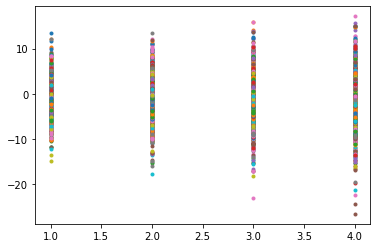

In [16]:
plt.plot(df_returns[1:], '.')
plt.show()

In [72]:
tau = [2.5, 25, 50, 75, 97.5]

pred_baseline = []

df = pd.DataFrame()

for i in range(0,5) : 
    
    for j in range(0,5): 
        pred_baseline.append(np.percentile(A[i], tau[j]))
        
      

  
  
print(pred_baseline)    
    
pred_baseline = pred_baseline    
x = np.reshape(pred_baseline, (5, 5))

print(x)
pred_baseline = x

[-2.8609244845514903, -0.6335265472880991, 0.08077554601690906, 0.7447210989341535, 2.7016564296980294, -4.249621257276974, -0.9107360673600962, 0.1518065565836224, 1.115226755871923, 3.8210365762438743, -5.1701733814570305, -1.0682148776820277, 0.23250728316233094, 1.4172079859810616, 4.539251522806459, -5.763759931567676, -1.2227952729531033, 0.28727746111609775, 1.6483736373918312, 5.202948129250937, -6.496784389648651, -1.3504663355789148, 0.37018170871352396, 1.9149878605686066, 5.657135413802097]
[[-2.86092448 -0.63352655  0.08077555  0.7447211   2.70165643]
 [-4.24962126 -0.91073607  0.15180656  1.11522676  3.82103658]
 [-5.17017338 -1.06821488  0.23250728  1.41720799  4.53925152]
 [-5.76375993 -1.22279527  0.28727746  1.64837364  5.20294813]
 [-6.49678439 -1.35046634  0.37018171  1.91498786  5.65713541]]


In [18]:
#get volatility index 

df_vix = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^VIX")

[*********************100%***********************]  1 of 1 completed


In [19]:
df_vix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2022-02-18,26.660000,29.709999,26.379999,27.750000,27.750000,0
2022-02-22,31.799999,32.040001,28.400000,28.809999,28.809999,0
2022-02-23,28.040001,31.070000,27.200001,31.020000,31.020000,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-10-24,67.800003,89.529999,67.800003,79.129997,79.129997,0


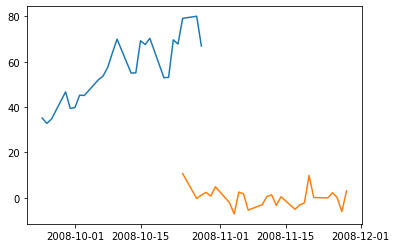

In [20]:
plt.plot(df_vix["Close"]["2008-09-24":"2008-10-28"])
plt.plot(df_dax["1Day Return"]["2008-10-24":"2008-11-28"])
plt.show

max_vix= df_vix[df_vix["High"] == max(df_vix["High"])]
max_vix

In [22]:
df_vix

dates = set(df_vix.index)
dates_dax = set(df_dax.index)
dates = dates.intersection(dates_dax)


df_dax.at[dates,"vix"] = df_vix["High"]

df_dax["vix"] = df_dax["vix"].interpolate(method='linear', limit_direction='forward', axis=0)




df_dax

,Open,High,Low,Close,Adj Close,Volume,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return,vix
Date,,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,4.057731,5.047698,5.885123,7.082493,3.192645,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.989967,1.827393,3.024763,-0.865086,-0.928903,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,0.837426,2.034796,-1.855053,-1.918870,-4.082157,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.197370,-2.692479,-2.756296,-4.919583,-4.023806,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,-3.889849,-3.953666,-6.116953,-5.221176,-7.504712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,15186.629883,15192.469727,14617.660156,14731.120117,14731.120117,78145800,NaN,NaN,NaN,NaN,NaN,30.875000
2022-02-22,14365.059570,14782.160156,14357.860352,14693.000000,14693.000000,115316300,NaN,NaN,NaN,NaN,NaN,32.040001
2022-02-23,14754.219727,14901.089844,14586.349609,14631.360352,14631.360352,89094500,NaN,NaN,NaN,NaN,NaN,31.070000


In [23]:
# pandas version rather than Keras.
def quantile_loss(q, y, f):
    # q: Quantile to be evaluated, e.g., 0.5 for median.
    # y: True value.
    # f: Fitted or predicted value.
    e = y - f
    return np.maximum(q * e, (q - 1) * e)

def tilted_loss(q, y, f):
    e = (y - f)
    return keras.backend.mean(keras.backend.maximum(q * e, (q - 1) * e), 
                              axis=-1)


In [24]:
optimizer = tf.optimizers.Adam(0.001)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [25]:
x_train = df_dax["vix"]["1990-01-02":"2021-07-01"]
x_test = df_dax["vix"]["2021-07-01":]

y_train = df_dax["1Day Return"]["1990-01-02":"2021-07-01"]
y_test = df_dax["1Day Return"]["2021-07-01":]

In [26]:
EPOCHS = 200
BATCH_SIZE = 32
UNITS = 512

In [27]:
def gb_quantilekeras_pred(x_train, train_labels, X, q):
    print(q)
    # Set input_dim for the number of features.München2021
    
    if len(x_train.shape) == 1:
        input_dim = 1
    else:
        input_dim = x_train.shape[1]
    model = keras.Sequential([
      keras.layers.Dense(UNITS, activation=tf.nn.relu,
                         input_dim=input_dim),
      keras.layers.Dense(UNITS, activation=tf.nn.relu),
      keras.layers.Dense(1)
    ])
    
    model.compile(loss=lambda y, f: tilted_loss(q, y, f), optimizer=optimizer)
    model.fit(x_train, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE,
              verbose=0, validation_split=0.2, callbacks=[early_stop])
    
    # Predict the quantile
    return model, model.predict(X)

In [28]:
N_ESTIMATORS = 1000
def gb_quantile(X_train, train_labels,X, q):
    gbf = ensemble.GradientBoostingRegressor(loss='quantile', alpha=q,
                                             n_estimators=N_ESTIMATORS,
                                             max_depth=3,
                                             learning_rate=0.1, min_samples_leaf=9,
                                             min_samples_split=9)
    gbf.fit(X_train, train_labels)
    return gbf, gbf.predict(X)

In [ ]:
x_test = df_dax["vix"]["2021-11-10":]
x_test 



Date
2021-11-10    19.900000
2021-11-11    18.389999
2021-11-12    17.690001
2021-11-15    17.459999
2021-11-16    17.080000
                ...    
2022-02-21    30.875000
2022-02-22    32.040001
2022-02-23    31.070000
2022-02-24    37.790001
2022-02-25    32.000000
Name: vix, Length: 76, dtype: float64

In [ ]:
data = df_dax[["vix", "1Day Return","2Day Return","3Day Return","4Day Return","5Day Return"]]

data = data[pd.notnull(data["vix"])]
data = data[pd.notnull(data["1Day Return"])]

data

,vix,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return
Date,,,,,,
1990-01-02,17.240000,-1.966961,-2.956042,-1.392405,-0.094836,-1.306637
1990-01-03,18.190001,-0.989081,0.574555,1.872125,0.660324,0.680397
1990-01-04,19.219999,1.563636,2.861206,1.649405,1.669478,2.616468
1990-01-05,20.110001,1.297570,0.085768,0.105842,1.052831,-0.059208
1990-01-08,20.260000,-1.211801,-1.191728,-0.244738,-1.356777,-3.237003
...,...,...,...,...,...,...
2022-02-10,24.770000,-2.037789,-0.080487,-0.188505,-1.026246,-2.511718
2022-02-11,30.990000,1.957303,1.849284,1.011543,-0.473929,-2.565719
2022-02-14,32.040001,-0.108019,-0.945760,-2.431231,-4.523022,-4.782130


In [ ]:
data

NameError: name 'data' is not defined

In [34]:
df_vix["High"].loc[1:3]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1] of type int

In [43]:

i = 5000
list(data["vix"][i-6:i-1])

[22.959999084472656,
 23.940000534057617,
 21.43000030517578,
 24.149999618530273,
 22.399999618530273]

In [29]:
list(data[[f"{1}Day Return",f"{2}Day Return",f"{3}Day Return",f"{4}Day Return",f"{5}Day Return"]].iloc[i])

[-3.889848773061644,
 -3.953665801266304,
 -6.1169526394686535,
 -5.221176328032584,
 -7.504712280566839]

In [56]:
window_size = 5
splits = []






training_x = pd.DataFrame()
training_y = pd.DataFrame()

for q in range(5):
    x_train_sw= []
    y_train_sw = []
    for i in range(window_size, len(data)):
        train = list(data["vix"][i-6:i-1])
        test = data[f"{q+1}Day Return"][i] #:i+3])
        x_train_sw.append(train)
        y_train_sw.append(test)
    training_x[f"{q+1}Day Return"] = pd.Series(x_train_sw)
    training_y[f"{q+1}Day Return"] = pd.Series(y_train_sw)

    

# View result


In [57]:
training_x = training_x[520:]
training_y = training_y[520:]

In [58]:
training_x

,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return
520,"[25.6299991607666, 26.280000686645508, 26.4400...","[25.6299991607666, 26.280000686645508, 26.4400...","[25.6299991607666, 26.280000686645508, 26.4400...","[25.6299991607666, 26.280000686645508, 26.4400...","[25.6299991607666, 26.280000686645508, 26.4400..."
521,"[26.280000686645508, 26.440000534057617, 27.25...","[26.280000686645508, 26.440000534057617, 27.25...","[26.280000686645508, 26.440000534057617, 27.25...","[26.280000686645508, 26.440000534057617, 27.25...","[26.280000686645508, 26.440000534057617, 27.25..."
522,"[26.440000534057617, 27.25, 25.360000610351562...","[26.440000534057617, 27.25, 25.360000610351562...","[26.440000534057617, 27.25, 25.360000610351562...","[26.440000534057617, 27.25, 25.360000610351562...","[26.440000534057617, 27.25, 25.360000610351562..."
523,"[27.25, 25.360000610351562, 24.8700008392334, ...","[27.25, 25.360000610351562, 24.8700008392334, ...","[27.25, 25.360000610351562, 24.8700008392334, ...","[27.25, 25.360000610351562, 24.8700008392334, ...","[27.25, 25.360000610351562, 24.8700008392334, ..."
524,"[25.360000610351562, 24.8700008392334, 24.3199...","[25.360000610351562, 24.8700008392334, 24.3199...","[25.360000610351562, 24.8700008392334, 24.3199...","[25.360000610351562, 24.8700008392334, 24.3199...","[25.360000610351562, 24.8700008392334, 24.3199..."
...,...,...,...,...,...
8620,"[30.989999771118164, 32.040000915527344, 28.09...","[30.989999771118164, 32.040000915527344, 28.09...","[30.989999771118164, 32.040000915527344, 28.09...","[30.989999771118164, 32.040000915527344, 28.09...","[30.989999771118164, 32.040000915527344, 28.09..."
8621,"[32.040000915527344, 28.09000015258789, 27.090...","[32.040000915527344, 28.09000015258789, 27.090...","[32.040000915527344, 28.09000015258789, 27.090...","[32.040000915527344, 28.09000015258789, 27.090...","[32.040000915527344, 28.09000015258789, 27.090..."
8622,"[28.09000015258789, 27.09000015258789, 28.3700...","[28.09000015258789, 27.09000015258789, 28.3700...","[28.09000015258789, 27.09000015258789, 28.3700...","[28.09000015258789, 27.09000015258789, 28.3700...","[28.09000015258789, 27.09000015258789, 28.3700..."
8623,"[27.09000015258789, 28.3700008392334, 29.70999...","[27.09000015258789, 28.3700008392334, 29.70999...","[27.09000015258789, 28.3700008392334, 29.70999...","[27.09000015258789, 28.3700008392334, 29.70999...","[27.09000015258789, 28.3700008392334, 29.70999..."


In [59]:
print(training_x.iloc[0,0])
print(training_x.iloc[0,1])

[25.6299991607666, 26.280000686645508, 26.440000534057617, 27.25, 25.360000610351562]
[25.6299991607666, 26.280000686645508, 26.440000534057617, 27.25, 25.360000610351562]


In [ ]:
y_train_sw[0]

-1.7758037508003532

In [61]:
QUANTILES = [0.025,0.25,0.5,0.75,0.975]

In [60]:

x_test_load = pd.read_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/DAX/Dataframes/xtest")



In [63]:
training_y
#[data[data.index == x].index.get_loc(data.index) for x in x_test.index]

indices_data = [data.index.get_loc(x) for x in x_test_load.index]

indices_data_dates =  x_test_load.index

indices_x = np.array(indices_data) 

In [73]:
indices_x

array([8460, 8465, 8470, 8475, 8480, 8485, 8490, 8495, 8500, 8505, 8510,
       8515, 8520, 8525, 8530, 8535, 8540, 8545, 8550, 8555, 8560, 8565,
       8570, 8575, 8580, 8585, 8589, 8593, 8598, 8603])

In [64]:
indices_data_dates

Index(['2021-07-01', '2021-07-08', '2021-07-15', '2021-07-22', '2021-07-29',
       '2021-08-05', '2021-08-12', '2021-08-19', '2021-08-26', '2021-09-02',
       '2021-09-09', '2021-09-16', '2021-09-23', '2021-09-30', '2021-10-07',
       '2021-10-14', '2021-10-21', '2021-10-28', '2021-11-04', '2021-11-11',
       '2021-11-18', '2021-11-25', '2021-12-02', '2021-12-09', '2021-12-16',
       '2021-12-23', '2021-12-30', '2022-01-06', '2022-01-13', '2022-01-20'],
      dtype='object')

In [74]:
x_test = training_x.loc[indices_x]["1Day Return"]
y_test = training_y.loc[indices_x]

y_test.index = indices_data_dates
x_test.index = indices_data_dates

In [77]:
(x_test)

2021-07-01    [17.309999465942383, 16.010000228881836, 15.53...
2021-07-08    [17.639999389648438, 21.290000915527344, 18.12...
2021-07-15    [17.510000228881836, 18.09000015258789, 18.700...
2021-07-22    [19.81999969482422, 18.450000762939453, 17.479...
2021-07-29    [19.6200008392334, 18.010000228881836, 19.7199...
2021-08-05    [18.899999618530273, 17.84000015258789, 17.5, ...
2021-08-12    [17.09000015258789, 16.420000076293945, 15.720...
2021-08-19    [21.639999389648438, 24.739999771118164, 23.89...
2021-08-26    [17.5, 19.270000457763672, 18.219999313354492,...
2021-09-02    [16.709999084472656, 16.979999542236328, 17.05...
2021-09-09    [19.639999389648438, 19.540000915527344, 21.12...
2021-09-16    [20.270000457763672, 19.760000228881836, 21.51...
2021-09-23    [23.399999618530273, 20.209999084472656, 20.40...
2021-09-30    [23.790000915527344, 24.709999084472656, 24.88...
2021-10-07    [24.399999618530273, 20.760000228881836, 19.94...
2021-10-14    [20.229999542236328, 18.07

In [67]:
x_train = training_x["1Day Return"][:-210]
y_train = training_y["1Day Return"][:-210]



In [79]:

#np.array(x_test).flatten()

def flatten(t):
    return [item for sublist in t for item in sublist]

x_test = flatten(x_test)

x_train = flatten(x_train)


In [80]:
x_test = np.array(x_test).reshape(-1,5)
x_train = np.array(x_train).reshape(-1,5)

In [81]:
x_test.shape

(30, 5)

In [82]:
x_train.shape

(7895, 5)

In [83]:
y_train.shape

(7895,)

In [84]:
y_test.shape

(30, 5)

In [85]:
results_gb = []

QUANTILES = [0.025,0.25,0.5,0.75,0.975]


for h in range(5):
    
    y_train = training_y[f"{h+1}Day Return"][:-210]

    model_1, pred1 = gb_quantile(x_train, y_train,x_test, QUANTILES[0])
    model_2, pred2 = gb_quantile(x_train, y_train,x_test, QUANTILES[1])
    model_3, pred3 = gb_quantile(x_train, y_train,x_test, QUANTILES[2])
    model_4, pred4 = gb_quantile(x_train, y_train,x_test, QUANTILES[3])
    model_5, pred5 = gb_quantile(x_train, y_train,x_test, QUANTILES[4])

    results_gb.append([pred1,pred2,pred3,pred4,pred5])
    


In [ ]:
QUANTILES

[0.025, 0.25, 0.5, 0.75, 0.975]

In [ ]:

numpy_returns = np.array(df_returns)
np.quantile(numpy_returns[4,:],0.025)

-6.494789226466757

In [ ]:
df_returns

numpy_returns = np.array(df_returns)
estimators = []

for q in QUANTILES:
    estimators_q = []
    for h in range(0,5):
        estimators_q.append(np.quantile(numpy_returns[h,:],q))
    estimators.append(estimators_q)    

In [ ]:
estimators = pd.DataFrame(estimators.T)

In [ ]:
results_gb_df

,0,1,2,3,4
0,"[-1.009995294624844, -0.028825532081153286, 0....","[-0.96564835210204, 0.0032581884989365847, 0.4...","[-0.9753401858466261, -0.06114998709311771, 0....","[-0.9579977790757636, 0.0600951688047887, 0.51...","[-0.8733385507456783, 0.026875347785132838, 0...."
1,"[0.17379118425624215, -0.025420876120251963, 1...","[0.17808368560276622, -0.008271305881544263, 1...","[0.2743173347462734, -0.02180356327781891, 1.8...","[0.24775923310286474, 0.03824005167695604, 2.1...","[0.2254605838713744, 0.010772877329229685, 1.8..."
2,"[-1.6827202694222954, -1.1027766176526452, 2.2...","[-1.641886117515786, -1.082933569947524, 2.427...","[-1.544546545468287, -1.0337440571676813, 2.41...","[-1.5323399689998882, -0.9808644975971884, 2.8...","[-1.5020695162581374, -0.9694205518732818, 2.3..."
3,"[0.1230576034036922, -1.607423049423758, 3.039...","[0.18592537551983912, -1.8613619744638985, 3.4...","[0.055073546159241704, -1.5424908723542865, 3....","[0.19585561050297323, -1.6696927731336804, 3.3...","[0.18853983530469776, -1.5568978447664226, 3.5..."
4,"[-2.3273495660711214, -3.8762322765122033, 1.0...","[-0.07120598014587386, -2.2168638326856196, 3....","[-0.04984496707526265, -1.1604579307116745, 3....","[0.5750388356081078, -0.9191240887485292, 4.79...","[1.8913625793499416, 0.6884070982585123, 6.753..."


In [ ]:
estimators

,0,1,2,3,4
0,-2.860927,-0.633069,0.081349,0.744758,2.701759
1,-4.250019,-0.909841,0.152503,1.115891,3.821562
2,-5.170873,-1.067362,0.233158,1.417573,4.539598
3,-5.763823,-1.221294,0.287674,1.649101,5.203545
4,-6.494789,-1.347555,0.370778,1.915897,5.657140


In [ ]:
estimators

,0,1,2,3,4
0,-2.860927,-0.633069,0.081349,0.744758,2.701759
1,-4.250019,-0.909841,0.152503,1.115891,3.821562
2,-5.170873,-1.067362,0.233158,1.417573,4.539598
3,-5.763823,-1.221294,0.287674,1.649101,5.203545
4,-6.494789,-1.347555,0.370778,1.915897,5.657140


In [ ]:
estimators

rows = []
for j in range(0,5):
    collums = []
    for i in range(0,5):
        collums.append([estimators.iloc[j,i]]*35)
    rows.append(collums)  

estimators_test_df = pd.DataFrame(rows)      

In [ ]:
estimators_test_df
estimators_test_df.to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/VIX and 5 Days/baseline_Dax")

In [ ]:
results_gb
results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/VIX and 5 Days/VIX_SW_daywise_30_obs")

In [ ]:
pd.DataFrame(x_train).to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/xy_test_data/vix_only/x_train")
pd.DataFrame(y_train).to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/xy_test_data/vix_only/y_train")
pd.DataFrame(x_test).to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/xy_test_data/vix_only/x_test")
pd.DataFrame(y_test).to_pickle("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Evaluation/Dax/xy_test_data/vix_only/y_test")

In [ ]:
results_gb


resluts = list(results_gb)

results = pd.DataFrame(index = range(5),columns = range(5))
for i in range(5):
    for j in range(5):
        results.iloc[i,j] = results_gb[i][j][0]
        

results 



results

results.to_csv("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_9/DAX",index=False,header=False)

In [ ]:
QUANTILES = [0.025,0.25,0.5,0.75,0.975]

x_train = np.array(x_train_sw[:6000])
x_test = np.array(df_vix.High[-5:])

results_keras = []

for h in range(5):
    y_train = df_dax[f"{h+1}Day Return"]["1990-01-02":"2021-07-01"]
    model_1, pred1 = gb_quantilekeras_pred(x_train, y_train,x_test, QUANTILES[0])
    model_2, pred2 = gb_quantilekeras_pred(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[1])
    model_3, pred3 = gb_quantilekeras_pred(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[2])
    model_4, pred4 = gb_quantilekeras_pred(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[3])
    model_5, pred5 = gb_quantilekeras_pred(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[4])

    results_keras.append([pred1,pred2,pred3,pred4,pred5])
    


0.025


ValueError: in user code:

    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Applications/anaconda3/envs/pyUdemy/lib/python3.8/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [ ]:
for h in range(5):
    y_train = df_dax[f"{h+1}Day Return"]["1990-01-02":"2021-07-01"]
    pred1 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[0])
    pred2 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[1])
    pred3 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[2])
    pred4 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[3])
    pred5 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[4])

    results_gb.append([pred1,pred2,pred3,pred4,pred5])

In [ ]:
for h in range(5):
    y_train = df_dax[f"{h+1}Day Return"]["1990-01-02":"2021-07-01"]
    
    pred1 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[0])
    pred2 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[1])
    pred3 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[2])
    pred4 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[3])
    pred5 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[4])

    results_gb.append([pred1,pred2,pred3,pred4,pred5])

In [ ]:
results_gb


resluts = list(results_gb)

results = pd.DataFrame(index = range(5),columns = range(5))
for i in range(5):
    for j in range(5):
        results.iloc[i,j] = results_gb[i][j][0]
        

results 



results

,0,1,2,3,4
0,-3.083792,-0.875095,0.04894,0.932024,2.690021
1,-4.571328,-0.958335,0.178571,1.476054,3.946626
2,-6.250105,-1.340605,0.270294,1.749442,4.392824
3,-6.886324,-1.663926,0.239794,2.097731,5.076225
4,-7.328322,-2.118093,0.297018,2.354789,5.936487


In [ ]:
results_keras


resluts = list(results_keras)

results = pd.DataFrame(index = range(5),columns = range(5))
for i in range(5):
    for j in range(5):
        results.iloc[i,j] = results_keras[i][j][0]
        

results 



results

,0,1,2,3,4
0,[-3.3022573],[-1.0966418],[0.08316682],[1.018188],[2.5943959]
1,[-5.3830466],[-1.5161912],[0.13698673],[1.5449094],[5.025577]
2,[-5.206363],[-1.3042939],[0.28073606],[1.8689411],[4.925773]
3,[-5.720798],[-2.0426779],[0.28117537],[2.4257839],[4.9656186]
4,[-8.524517],[-1.8365837],[0.38949746],[2.2431793],[6.2048445]


In [ ]:
results_keras

[[array([[-3.3022573]], dtype=float32),
  array([[-1.0966418]], dtype=float32),
  array([[0.08316682]], dtype=float32),
  array([[1.018188]], dtype=float32),
  array([[2.5943959]], dtype=float32)],
 [array([[-5.3830466]], dtype=float32),
  array([[-1.5161912]], dtype=float32),
  array([[0.13698673]], dtype=float32),
  array([[1.5449094]], dtype=float32),
  array([[5.025577]], dtype=float32)],
 [array([[-5.206363]], dtype=float32),
  array([[-1.3042939]], dtype=float32),
  array([[0.28073606]], dtype=float32),
  array([[1.8689411]], dtype=float32),
  array([[4.925773]], dtype=float32)],
 [array([[-5.720798]], dtype=float32),
  array([[-2.0426779]], dtype=float32),
  array([[0.28117537]], dtype=float32),
  array([[2.4257839]], dtype=float32),
  array([[4.9656186]], dtype=float32)],
 [array([[-8.524517]], dtype=float32),
  array([[-1.8365837]], dtype=float32),
  array([[0.38949746]], dtype=float32),
  array([[2.2431793]], dtype=float32),
  array([[6.2048445]], dtype=float32)]]

In [ ]:
results.to_csv("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_5/DAX",index=False,header=False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_5/DAX'

In [ ]:


model_1 = keras_pred(x_train, y_train, QUANTILES[0])
model_2 = keras_pred(x_train, y_train, QUANTILES[1])
model_3 = keras_pred(x_train, y_train, QUANTILES[2])
model_4 = keras_pred(x_train, y_train, QUANTILES[3])
model_5 = keras_pred(x_train, y_train, QUANTILES[4])

0.025
0.25
0.5
0.75
0.975


In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
x_test 

r1 = model_1.predict(x_test)
r2 = model_2.predict(x_test)
r3 =model_3.predict(x_test)
r4 =model_4.predict(x_test)
r5 =model_5.predict(x_test)


In [ ]:
r5

array([[1.8642938],
       [1.8071624],
       [1.95303  ],
       [2.0988977],
       [2.0624306],
       [2.5061114],
       [2.1219933],
       [2.0478442],
       [2.0125926],
       [2.0466285],
       [2.1171312],
       [2.1912806],
       [2.9680257],
       [2.710326 ],
       [2.3274238],
       [2.1608918],
       [2.0429816],
       [2.2751544],
       [2.4027886],
       [2.3031125],
       [2.1074066],
       [2.315268 ],
       [2.3335016],
       [2.4027886],
       [2.215592 ],
       [2.0867422],
       [2.045413 ],
       [2.0320415],
       [1.9907123],
       [1.9955748],
       [1.914132 ],
       [1.8290426],
       [2.0709395],
       [2.295819 ],
       [2.5486562],
       [2.9254808],
       [2.8233736],
       [2.22167  ],
       [2.0466285],
       [2.045413 ],
       [2.2605677],
       [2.1329334],
       [1.9603232],
       [1.9931436],
       [1.9493831],
       [1.9822035],
       [1.991928 ],
       [2.072763 ],
       [2.153598 ],
       [2.3055434],


In [ ]:
preds.loc[preds.method == 'QuantReg', 'pred'] = np.concatenate(
    [quantreg.fit(q=q).predict(X_test) for q in QUANTILES])

In [ ]:
def save_sklearnmodel():
    # save the model to disk
    filename = 'finalized_model.sav'
    pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))



In [ ]:
#quantile Regression 
#Change
tau = [2.5, 25, 50, 75, 97.5]

predictions_h = {}
for h in range(1,6):
    y_true_mean = 0 #by definition of daily returns 
    X =  abs(A[0].take(len(A[0])-1)).reshape(-1, 1)
    X_train = A[0][-(1000+h):-h].reshape(-1, 1)  # last 1000 daily returns
    y_train = A[h-1][-1000:] # followed h- step return


    quantiles = [i/100 for i in tau]
    predictions = {}
    out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0).fit(X_train, y_train)

        util.save_sklearnmodel("quantile_reg", qr,h,quantile)
        y_pred = qr.predict(X)
        predictions[quantile] = y_pred
        print(y_pred)

        


        #if quantile == min(quantiles):
        #    out_bounds_predictions = np.logical_or(
        #        out_bounds_predictions, y_pred >= y_train
         #   )
        #elif quantile == max(quantiles):
        #    out_bounds_predictions = np.logical_or(
        #        out_bounds_predictions, y_pred <= y_train
         #   )
    predictions_h[h] = predictions       

FileNotFoundError: [Errno 2] No such file or directory: 'DAX_prediction/Models/quantile_reg/1_0.025.sav'

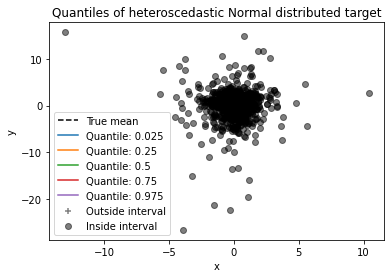

In [ ]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    X_train[out_bounds_predictions],
    y_train[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    X_train[~out_bounds_predictions],
    y_train[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

In [ ]:
print(predictions_h)

pred_results = pd.DataFrame.from_dict(predictions_h)
print(pred_results)

type(pred_results)
pred_results = pred_results.T
print(pred_results)
test = pred_results.to_numpy
print(test)
filename = "/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_2/DAX_help"
pred_results.to_csv(filename, header=False, index = False)


filename2 = "/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_2/DAX"

import csv
import string

input_file = open(filename, 'r')
output_file = open(filename2, 'w')
data = csv.reader(input_file)
writer = csv.writer(output_file)
special1 = ']'
special2 = '['

for line in data:
    line = [value.replace(special1, '') for value in line]
    line = [value.replace(special2, '') for value in line]
    writer.writerow(line)

input_file.close()
output_file.close() 



{1: {0.025: array([-2.60670938]), 0.25: array([-0.4785351]), 0.5: array([0.05266576]), 0.75: array([0.6356064]), 0.975: array([2.27763726])}, 2: {0.025: array([-3.96210717]), 0.25: array([-0.7291363]), 0.5: array([0.13498626]), 0.75: array([0.89325718]), 0.975: array([3.12789041])}, 3: {0.025: array([-4.66434809]), 0.25: array([-0.83179847]), 0.5: array([0.13585555]), 0.75: array([1.16964167]), 0.975: array([3.98828906])}, 4: {0.025: array([-5.02729947]), 0.25: array([-0.93105441]), 0.5: array([0.21378275]), 0.75: array([1.33655287]), 0.975: array([4.81988741])}, 5: {0.025: array([-5.81195571]), 0.25: array([-1.02391908]), 0.5: array([0.35795497]), 0.75: array([1.47856594]), 0.975: array([5.31422962])}}
                            1                      2                      3  \
0.025    [-2.606709377715513]  [-3.9621071701803205]   [-4.664348092006935]   
0.250  [-0.47853509889087514]  [-0.7291362979727027]  [-0.8317984701411101]   
0.500   [0.05266576495731046]   [0.134986262016123